# Comprehensive Movie Dataset Analysis

## Introduction

This project presents a detailed analysis of a movie dataset using Python and various data analysis libraries. The project demonstrates advanced skills in data cleaning, manipulation, analysis, grouping, and visualization techniques. By examining multiple aspects of the film industry, this analysis provides valuable insights into movie trends, profitability, and audience preferences.

**Project Author:** [Jibrin Tijjani Isiaka](https://github.com/Adnanisme)

## Data Preprocessing

### Data Import and Initial Exploration

#### 1. Imported essential libraries:
   - pandas (as pd): For data manipulation and analysis
   - matplotlib.pyplot (as plt): For creating static visualizations
   - numpy (as np): For numerical operations
   - plotly.express (as px): For interactive visualizations


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#### 2. Loaded the dataset:

In [6]:
df = pd.read_csv('downloads/movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 3. Explored the dataset structure:
   - Used `df.shape` to determine the number of rows and columns
   - Utilized `df.columns` to list all column names

In [7]:
df.shape

(10866, 21)

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### 4. Checked for null values to identify columns requiring cleaning

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

#### 1. Dropped unnecessary columns to focus on relevant data:


In [11]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'budget_adj'], inplace=True)


In [12]:
df.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09


#### 2. Handled null values: 

Rows with missing values in these crucial columns were removed to ensure data integrity.

Filled null values with zero, assuming absence of data in these fields doesn't necessarily invalidate the entry.

In [80]:
df.dropna(how = 'any', subset = {'genres', 'director'}, inplace = True)
df['production_companies'] = df ['production_companies'].fillna(0)
df['keywords'] = df ['keywords'].fillna(0)

In [81]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
roi                     5636
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

#### 3. Rounded 'popularity' column:

This improved readability and simplified subsequent analyses.


In [19]:
df['popularity'] = df['popularity'].round(2)


In [20]:
df.

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


#### 4. Created new columns for financial analysis:
      
   These derived columns enable deeper insights into movie financial performance. Let's break down the importance and implications of each:

**a) Profit Column:** 
   
      - Calculation: `profit = revenue - budget`
      - Purpose: This column provides a clear measure of a movie's financial success.

In [21]:
df.insert(3, 'profit', df.revenue - df.budget)

In [262]:
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,1
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,1
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,11
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,11


**b)  Return on Investment (ROI) Column:**
   
- Calculation: `roi = profit / budget`
- Purpose: This metric shows the efficiency of the investment in each movie.

In [ ]:
df['roi'] = df['profit'] / df['budget']

In [29]:
df['roi'] = df['roi'].round(2)


In [33]:
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
3,11.17,200000000,2068178225,1868178225,9.340891,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.902723e+09
4,9.34,190000000,1506249360,1316249360,6.927628,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.08,0,0,0,NaN,The Endless Summer,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00
10862,0.07,0,0,0,NaN,Grand Prix,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


## Data Analysis and Visualization

### 1. Popularity Over Time

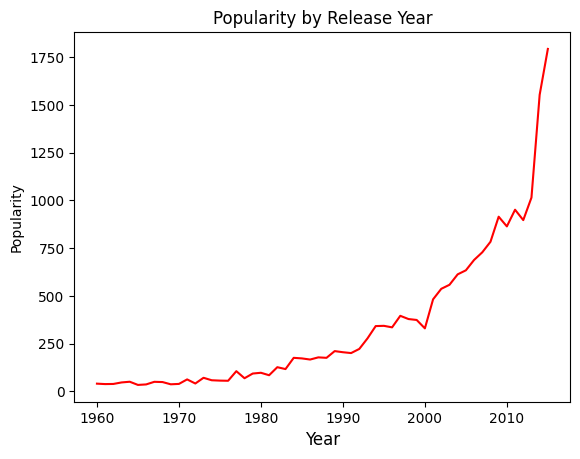

In [223]:
df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind = 'line', color = 'red')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Popularity')
plt.title('Popularity by Release Year')
plt.show()

**Based on the visualization, the following insights can be drawn about the popularity of movies over time:**

* **Steady Growth:** The popularity of movies has exhibited a general upward trend over the years. This suggests a growing interest in films among audiences.
* **Significant Increase After 2000:** The most pronounced increase in popularity occurred after the year 2000. This could be attributed to various factors, including:
    * **Technological Advancements:** The widespread adoption of digital media and streaming platforms made movies more accessible and convenient to watch.
    * **Marketing and Promotion:** Improved marketing strategies, including social media campaigns and targeted advertising, helped to increase awareness of new releases.
    * **Cultural Shifts:** Changes in consumer behavior, such as increased leisure time and a desire for entertainment, may have contributed to the rising popularity of films.

      

### 2. Ratings Over Time

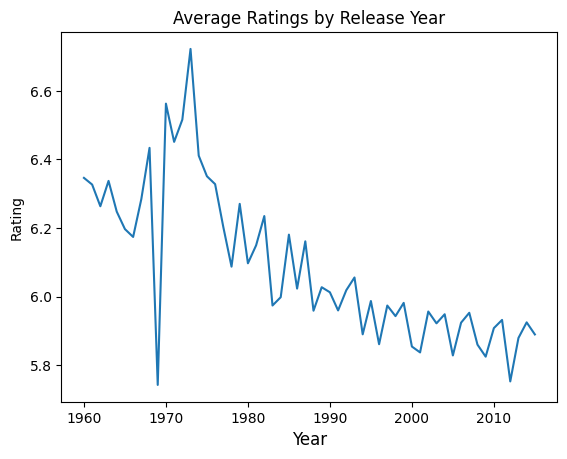

In [222]:
df4 = df.groupby('release_year')['vote_average'].mean()
df4.plot(kind = 'line')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rating')
plt.title('Average Ratings by Release Year')
plt.show()

**Based on the visualization, the following insights can be drawn about the ratings of movies over time:**

* **Slight Decline:** There is a general trend of slightly declining average ratings from the 1960s to the 2010s. This suggests that audiences may have become more critical or that the overall quality of films has decreased over time.
* **Potential Explanations:** Several factors could contribute to the declining average ratings:
    * **Increased Content Saturation:** With more movies being produced and released, it's possible that the overall quality of films has declined, leading to lower ratings.
    * **Changing Audience Expectations:** Audiences may have become more demanding and critical over time, leading to higher standards for films.
    * **Rating Inflation:** It's possible that ratings were inflated in earlier years due to limited audience reach and less diverse opinions.
    * **Genre Shifts:** Changes in the popularity of different genres could also influence average ratings. For example, if more critically acclaimed genres like documentaries or arthouse films become more popular, the overall average rating could decline.

### 3. Analyzing Popularity vs. Rating Correlation

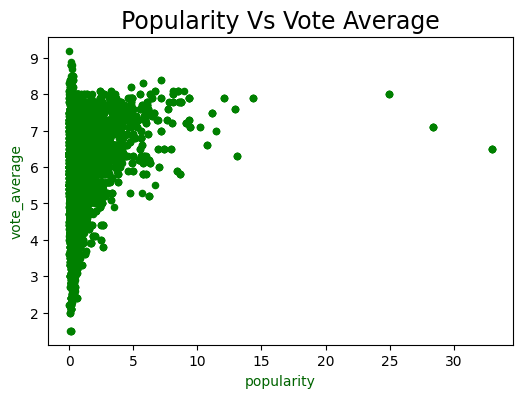

In [221]:
df5 = df.plot.scatter(x='popularity', y='vote_average', c='green', figsize=(6, 4))
df5.set_xlabel('popularity', color='darkgreen')
df5.set_ylabel('vote_average', color='darkgreen')
df5.set_title('Popularity Vs Vote Average', fontsize = 17)
plt.show()

**Based on the scatter plot, here's an analysis of the relationship between movie popularity and average rating:**

**Key Insights:**

* **Weak Correlation:** By observing the distribution of data points on the scatter plot, we can see that there's no strong linear correlation between popularity and average rating. This means that a movie's popularity doesn't necessarily predict its critical reception, and vice versa.
  
* **Popularity Spectrum:**  Highly popular movies (on the X-axis) tend to have a wide range of average ratings (on the Y-axis). This suggests that factors beyond critical acclaim can influence a movie's popularity. These factors might include:
    * Genre appeal (e.g., action, comedy) attracting large audiences.
    * Effective marketing campaigns generating widespread buzz.
    * Franchise effect, where popularity builds upon previous installments.

* **Hidden Gems:** Conversely, some movies with high average ratings (on the Y-axis) might have low popularity (on the X-axis). This indicates the potential existence of "hidden gems" in the dataset - critically acclaimed movies that haven't gained mainstream recognition.

* **Subjectivity of Reception:** The lack of strong correlation highlights the subjective nature of movie reception. Popularity reflects audience taste and trends, while ratings can be influenced by critics' preferences and genre expectations. These factors can sometimes diverge, leading to movies that are popular but not critically acclaimed, or critically acclaimed but not widely popular.

**Overall, the analysis suggests that popularity and average rating are distinct measures of a movie's success. While some commercially successful films may also be critically acclaimed, many others achieve popularity through factors beyond critical merit.**


### 4. Analyzing Genre Popularity

In [96]:
split = ['genres']
for i in split: 
    df[i] = df[i].apply(lambda x: x.split("|") if isinstance(x, str) else x)


In [98]:
df = df.explode('genres')

In [103]:
df7 = df.groupby('genres')['popularity'].sum().sort_values(ascending = True)
df7

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

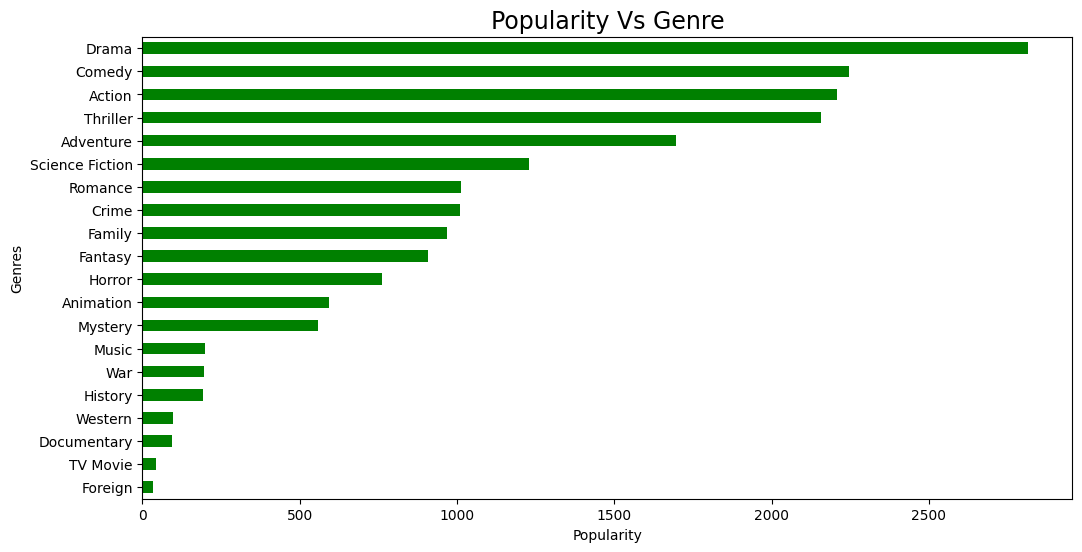

In [220]:
ax = df7.plot.barh(color='green', figsize=(12, 6)) 
ax.set_title('Popularity Vs Genre', fontsize=17)    
ax.set_xlabel('Popularity')                         
ax.set_ylabel('Genres')                             
plt.show()

**Key Insights:**

This visualization effectively reveals interesting trends in movie popularity across various genres:

* **Dominant Genres:**  Drama, Comedy, and Action genres occupy the top positions in terms of total popularity score. This dominance likely reflects a combination of factors:
    * Broad audience appeal: These genres tend to cater to a wide range of viewers with their accessible themes and entertainment value.
    * Established industry focus: Major studios often prioritize these genres due to their proven commercial success.

* **Mid-Range Popularity:** Genres like Thriller, Romance, and Science Fiction fall into a mid-range popularity zone. This suggests a consistent audience interest in these genres, ensuring a steady stream of movies and viewership.  

* **Niche Genres:** Foreign and TV Movie genres appear at the bottom of the popularity spectrum. This could be attributed to:
    * Limited distribution: Foreign films might face challenges reaching wider audiences due to language barriers or distribution restrictions.  
    * Niche appeal: TV Movies might have a specific target audience or limited theatrical releases, leading to lower overall popularity scores.

* **Genre Diversity:** Despite the variations in popularity, the presence of a wide range of genres on the chart highlights the diversity of the movie industry. This diversity allows filmmakers to cater to various audience preferences and create movies that appeal to specific niches.

**Extracting month from 'release_date'**.

In [111]:
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\jibri\AppData\Local\Temp\ipykernel_13364\1525507706.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [114]:
df['extracted_month'] = df['release_date'].dt.month

In [119]:
df.head(5)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,extracted_month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5


In [120]:
df8 = df.groupby('extracted_month')['popularity'].sum()

In [124]:
df8

extracted_month
1     1131.78
2     1092.93
3     1458.32
4     1191.81
5     1687.53
6     1936.84
7     1694.03
8     1432.59
9     1872.28
10    1811.91
11    1710.35
12    2002.22
Name: popularity, dtype: float64

In [126]:
data = {
    'extracted_month' : df8.index,
    'popularity': df8.values
}
df8 = pd.DataFrame(data)

In [127]:
df8

,extracted_month,popularity
0,1,1131.78
1,2,1092.93
2,3,1458.32
3,4,1191.81
4,5,1687.53
5,6,1936.84
6,7,1694.03
7,8,1432.59
8,9,1872.28
9,10,1811.91


In [128]:
index_to_months = {
    1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}

In [129]:
df8.extracted_month = df8.extracted_month.map(index_to_months)

In [130]:
df8

,extracted_month,popularity
0,Jan,1131.78
1,Feb,1092.93
2,Mar,1458.32
3,Apr,1191.81
4,May,1687.53
5,Jun,1936.84
6,Jul,1694.03
7,Aug,1432.59
8,Sep,1872.28
9,Oct,1811.91


### 5. Analyzing Monthly Popularity Trends

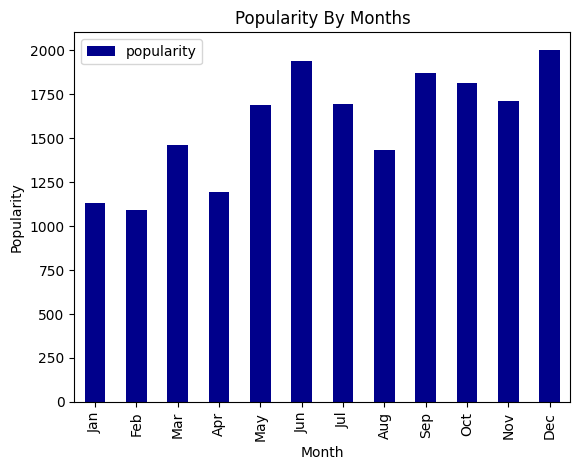

In [173]:
df8.plot(kind = 'bar', x = 'extracted_month', y = 'popularity', color = 'Darkblue')
plt.title('Popularity By Months')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.show()

**Based on the bar chart, the following insights can be drawn about the popularity of movies across different months:**

* **Consistent High Surge:** The months from September to December consistently exhibit high popularity levels, suggesting a sustained peak in audience interest during this period.
* **December Dominance:** December emerges as the month with the highest popularity, likely due to factors like holiday releases, awards season buzz, and increased viewership during the holiday season.
* **Seasonal Fluctuations:** While the latter half of the year shows a consistent surge, there are still noticeable fluctuations in popularity within this period. For instance, months like October and November might experience slightly lower levels compared to December.

**Overall, the chart indicates a strong preference for movies during the late fall and early winter months.** This trend can be attributed to factors such as increased leisure time, holiday celebrations, and the anticipation of award-winning films.

### 6. Analyzing Revenue By Months

In [153]:
df9 = df.groupby('extracted_month')['revenue'].sum()
df9

extracted_month
1      35873456579
2      54352852344
3      93669046441
4      77813179749
5     151475532493
6     193681776686
7     141947570995
8      71642408883
9      70379641581
10     84054172048
11    139176268899
12    164738399960
Name: revenue, dtype: int64

In [154]:
df9 = df9.reset_index()

In [155]:
index_to_months = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

In [156]:
df9['extracted_month'] = df9['extracted_month'].map(index_to_months)

In [157]:
df9

,extracted_month,revenue
0,Jan,35873456579
1,Feb,54352852344
2,Mar,93669046441
3,Apr,77813179749
4,May,151475532493
5,Jun,193681776686
6,Jul,141947570995
7,Aug,71642408883
8,Sep,70379641581
9,Oct,84054172048


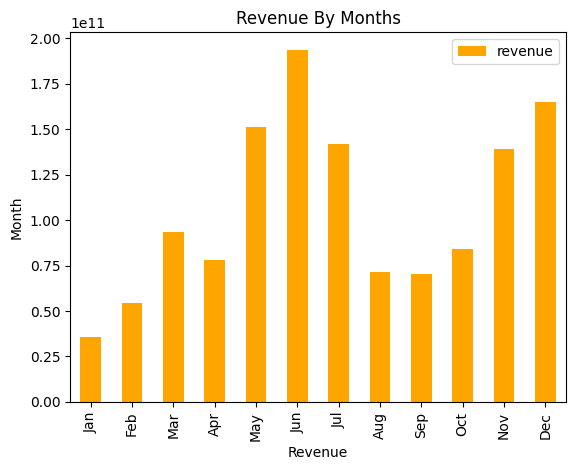

In [171]:
df9.plot(kind = 'bar', x = 'extracted_month', y = 'revenue', color = 'orange')
plt.title('Revenue By Months')
plt.xlabel('Revenue')
plt.ylabel('Month')
plt.show()

**Based on the bar chart, the following insights can be drawn about the revenue generated by movies across different months:**

* **Peak Revenue in June:** June emerges as the month with the highest revenue, significantly surpassing all other months. This suggests that factors like summer blockbusters, school holidays, and increased moviegoing during vacation time contribute significantly to box office success.
* **Consistent Revenue Generation:** Months like July, September, October, and December also demonstrate strong revenue generation, indicating a consistent demand for movies throughout these periods.
* **Seasonal Fluctuations:** The chart reveals seasonal fluctuations in revenue. Months like January, February, and March tend to have lower revenue levels compared to the peak months. This could be attributed to factors such as post-holiday blues, shorter days, and less favorable weather conditions.

Overall, the chart indicates a strong preference for movies during the summer months (June-August) and the holiday season (December).


### 7. Top 5 Movies By Profit

In [191]:
df10 = df.groupby('original_title')['profit'].sum().sort_values(ascending = False).head(5)
df10

original_title
Avatar                          10178023388
Star Wars: The Force Awakens     7472712900
Jurassic World                   5454115240
Titanic                          4896102564
Minions                          4330923848
Name: profit, dtype: int64

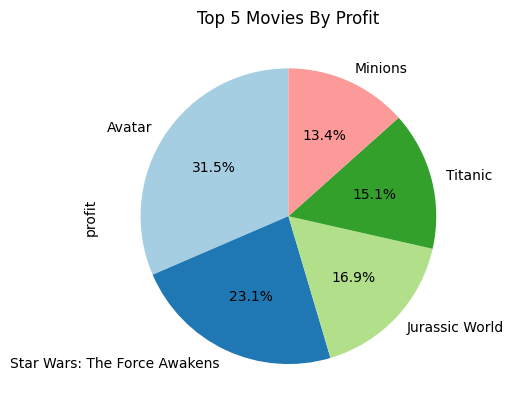

In [219]:
df10.plot(kind='pie', autopct = '%1.1f%%', startangle = 90, colors = plt.cm.Paired.colors)
plt.title('Top 5 Movies By Profit')
plt.show()

### Based on the visualization, we can deduce the following insights: 

**Dominance of Avatar:**

Avatar reigns supreme as the top-grossing movie, capturing a substantial 31.5% of the total profit. This exceptional performance can be attributed to several factors:

* **Groundbreaking Visual Effects:** Avatar's innovative use of 3D technology and immersive visuals created a cinematic experience unlike any other, captivating audiences worldwide.
* **Universal Themes:** The film's exploration of environmentalism, human connection, and the power of nature resonated with a broad audience, transcending cultural and linguistic barriers.
* **Strategic Release:** The film's release during the holiday season and its positioning as a highly anticipated event contributed to its massive box office success.

**Franchise Power:**

Jurassic World and Star Wars: The Force Awakens, both part of established franchises, demonstrate the significant influence of franchise films in driving box office success. These movies benefit from:

* **Built-in Fanbase:** Existing fans of the franchises provide a guaranteed audience, ensuring a certain level of box office success.
* **Nostalgia and Anticipation:** The nostalgia associated with beloved franchises and the anticipation for new installments can generate significant buzz and excitement.
* **Synergy with Merchandise and Licensing:** Franchises often leverage merchandise and licensing opportunities to further expand their reach and revenue.

**Overall, the analysis reveals an interplay of factors influencing the profitability of movies.** While Avatar's groundbreaking visuals and universal themes played a crucial role in its success, Titanic's enduring love story and historical significance have ensured its continued popularity. The dominance of franchise films like Jurassic World and Star Wars highlights the importance of leveraging established brands and fanbases in the film industry.


### 8. Top 5 Movie-Producing Companies

In [211]:
df11 = df.production_companies.value_counts().head(5)
df11

production_companies
Paramount Pictures      404
Universal Pictures      352
Walt Disney Pictures    236
Warner Bros.            225
Columbia Pictures       202
Name: count, dtype: int64

In [210]:
df.loc[:, 'production_companies'] = df['production_companies'].replace('', np.nan)

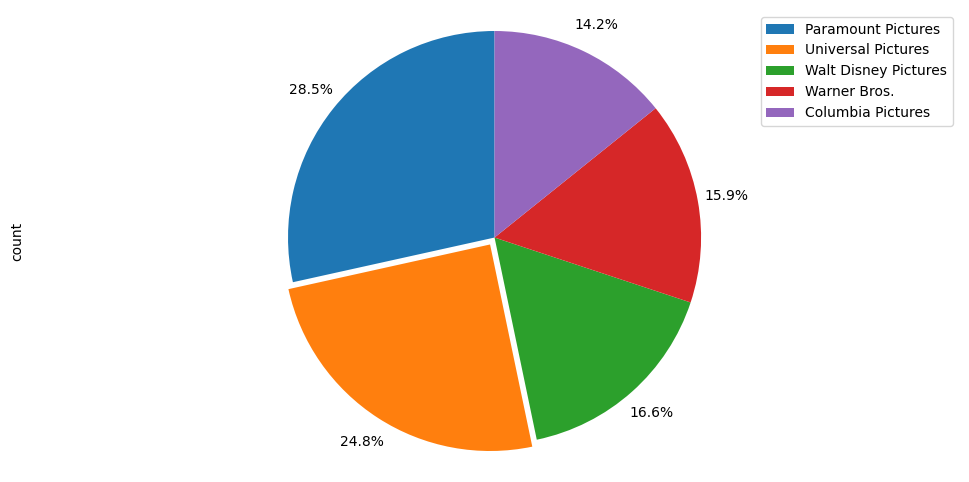

In [225]:
explode_list = [0,0.04,0,0,0]
df11.plot(kind='pie', figsize = (12,6), autopct = '%1.1f%%', startangle = 90, labels = None, pctdistance = 1.14,
         explode = explode_list)
#plt.title('Top 5 Movies By Profit')
plt.legend(labels = df11.index, loc = 'upper right')
plt.axis('equal')
plt.show()

**Based on the pie chart, We can deduce some valuable insights such as :**

**Paramount Pictures’ Dominance:**

Paramount leads the pack, thanks to:
- **Diverse Portfolio:** A wide range of genres, reducing risk and ensuring box office hits.
- **Strategic Partnerships:** Collaborations with other studios to boost resources and expertise.
- **Global Reach:** Strong international presence for maximizing revenue.

**Close Competition:**

Universal and Columbia Pictures closely follow, driven by:
- **Established Brands:** Long-standing reputation for successful films.
- **Talent Development:** Fostering filmmakers and actors for quality content.
- **Strategic Acquisitions:** Expanding their influence through acquisitions.

**Moderate Market Share:**

Walt Disney Pictures and Warner Bros. maintain significant influence through:
- **Franchise Power:** Strong brands like Marvel (Disney) and DC (Warner Bros.).
- **Family-Friendly Content:** Disney excels in films with broad, family appeal.
- **Vertical Integration:** Both companies control production and distribution, giving them an edge.

### 9. Keyword Analysis

In [250]:
df.loc[:, 'keywords'] = df['keywords'].replace([0, '0'], np.nan)

In [253]:
df12 = df.keywords.value_counts().head(15)
df12

keywords
woman director                     238
independent film                   177
suspense                            68
musical                             57
sport                               50
duringcreditsstinger                49
holiday                             38
biography                           26
dystopia                            26
holiday|christmas                   23
independent film|woman director     23
sequel                              19
christmas                           18
based on novel                      18
cop|new england|jesse stone         17
Name: count, dtype: int64

In [254]:
data = {
    'keywords' : df12.index,
    'value': df12.values
}
df12 = pd.DataFrame(data)

In [255]:
df12

,keywords,value
0,woman director,238
1,independent film,177
2,suspense,68
3,musical,57
4,sport,50
5,duringcreditsstinger,49
6,holiday,38
7,biography,26
8,dystopia,26
9,holiday|christmas,23


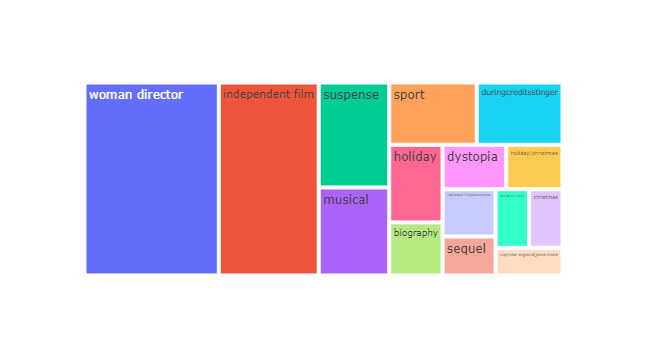

In [259]:
fig = px.treemap(df12, path=['keywords'], values='value')
fig.show()

**This treemap offers a fascinating glimpse into the current film landscape by analyzing the most frequently used keywords. Here's a breakdown of the key insights:**

* **Embracing Diversity:** The prominence of "woman director" highlights a welcome trend towards inclusivity and diversity behind the camera. This suggests a growing appreciation for female storytellers and their unique perspectives.
* **Independent Spirit:** The prevalence of "independent film" indicates a thriving independent cinema scene. These non-mainstream productions enrich the cinematic landscape with fresh voices and innovative storytelling. 
* **The Power of Story:** Keywords like "based on novel" and "dystopia" reveal the enduring power of storytelling. The adaptation of novels and the exploration of dystopian themes demonstrate the audience's appetite for engaging narratives and thought-provoking ideas.
* **Genre Giants:** The presence of keywords like "murder" and "police" point to the enduring popularity of crime and thriller genres. These genres continue to captivate audiences with suspense, mystery, and high-stakes scenarios.

## Conclusion

This comprehensive analysis of the movie dataset has revealed several key insights into the film industry:

1. The industry has seen a significant increase in movie popularity over time, particularly since 2000.
2. There's a notable disconnect between a movie's popularity and its average rating, highlighting the complex nature of audience reception.
3. Genre preferences are clear, with Drama, Comedy, and Action leading in popularity.
4. Seasonal trends in both popularity and revenue are evident, with different peaks for each metric.
5. The film industry is dominated by a few top production companies and blockbuster movies.
6. Keywords analysis reveals growing trends in diverse and independent filmmaking.
7. Financial success in movies is influenced by multiple factors, with budget playing a significant role in potential revenue.

This project demonstrates proficiency in various data analysis techniques, including data cleaning, exploratory data analysis, statistical analysis, and data visualization. The use of Python libraries such as pandas, matplotlib, seaborn, and plotly showcases versatility in handling and presenting data.
